# Plot OpenFAST Outputs

In [1]:
# Load all the tools
import numpy as np
# from wisdem.aeroelasticse.CaseLibrary import ROSCO_Test
import os, subprocess

from weis.aeroelasticse.FAST_reader import InputReader_Common, InputReader_OpenFAST, InputReader_FAST7
from weis.aeroelasticse.FAST_writer import InputWriter_Common, InputWriter_OpenFAST, InputWriter_FAST7
from weis.aeroelasticse.runFAST_pywrapper import runFAST_pywrapper_batch
from weis.aeroelasticse.CaseGen_General import CaseGen_General
from weis.aeroelasticse.CaseGen_IEC import CaseGen_IEC
from pCrunch import pdTools
from pCrunch import Processing, Analysis
from weis.aeroelasticse.Util import FileTools
# Instantiate fast_IO
from ROSCO_toolbox import utilities as ROSCO_utilities
fast_io = ROSCO_utilities.FAST_IO()
fast_pl = ROSCO_utilities.FAST_Plots()
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

i_fig = 0

Set outputs

In [7]:
outfiles = [
    '/Users/dzalkind/Tools/ROSCO_toolbox/Test_Cases/NREL-5MW/NREL-5MW.out',
#     '/Users/dzalkind/Tools/WEIS-3/results/CT-barge/DISCON-CT-barge_hiBW/simp/step_1.outb',
]



In [8]:
# pull from eagle if necessary
pull_script = '/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh'


basedir = outfiles[0].split('/')[1]
# if basedir == 'scratch':
    
temp = outfiles[0].split('/')
filedir = '/'.join(temp[:-1]) + '/'

namebase = temp[-1].split('.')[0]
search_str = namebase + '*'

shell_cmd = pull_script + ' ' + filedir + ' ' + namebase

shell_cmd
# ret = subprocess.call(pull_script,shell=True)


'/Users/dzalkind/Tools/WEIS-3/pCrunch/HPC_tools/eagle2local_sim_inp.sh /Users/dzalkind/Tools/ROSCO_toolbox/Test_Cases/NREL-5MW/ NREL-5MW'

In [9]:
# ret

NameError: name 'ret' is not defined

PtfmPitch is not available as an output channel.
PtfmYaw is not available as an output channel.
NacYaw is not available as an output channel.
RtVAvgxh is not available as an output channel.
Fl_Pitcom is not available as an output channel.
FA_AccR is not available as an output channel.
PtfmPitcpull_scriptdOmF is not available as an output channel.
PtfmSurge is not available as an output channel.
PtfmSway is not available as an output channel.
PtfmHeave is not available as an output channel.
PtfmPitch is not available as an output channel.
PtfmRoll is not available as an output channel.
PtfmYaw is not available as an output channel.


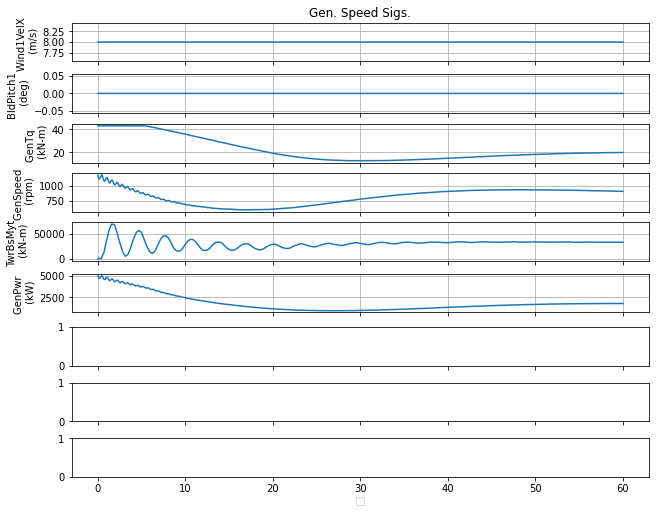

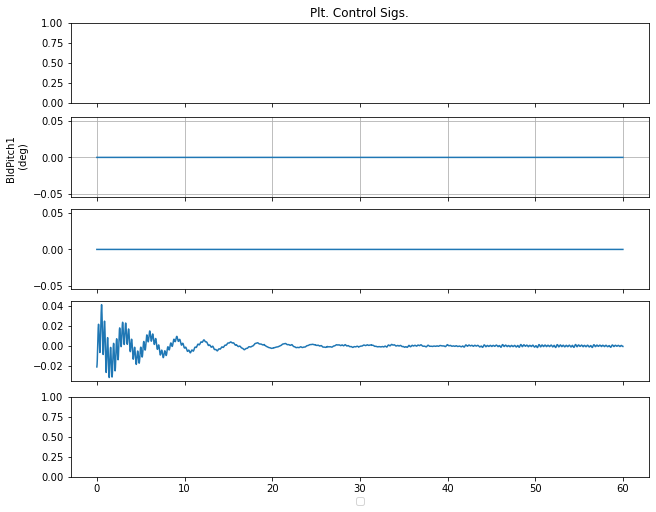

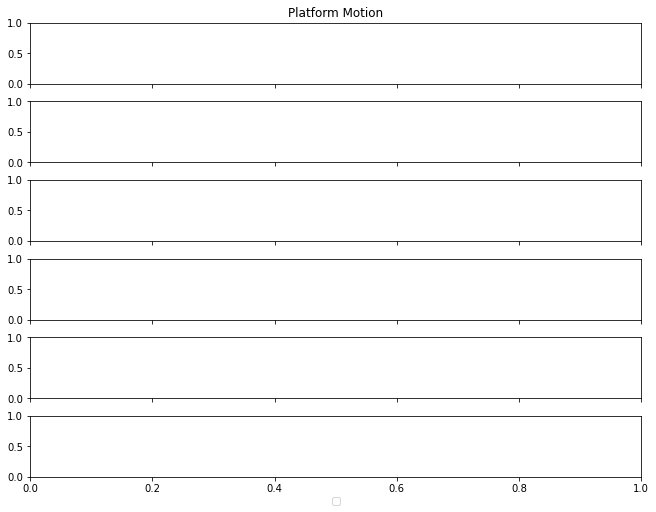

In [12]:
output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]

#  Define Plot cases 
cases = {}
cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','PtfmPitch','PtfmYaw','NacYaw']
cases['Plt. Control Sigs.'] = ['RtVAvgxh', 'BldPitch1', 'Fl_Pitcom', 'FA_AccR','PtfmPitcpull_scriptdOmF']
cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']



# Rosco outfiles
r_outfiles = [out.split('.out')[0] + '.RO.dbg' for out in outfiles]

fast_out = fast_io.load_fast_out(outfiles, tmin=0)
rosco_out = fast_io.load_fast_out(r_outfiles, tmin=0)
    
# Combine outputs
comb_out = [None] * len(fast_out)
for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
    r_out.update(f_out)
    comb_out[i] = r_out

if False:
    comb_out[0]['meta']['name'] = 'Variable Bandwidth'

    
# Plot
fig, ax = fast_pl.plot_fast_out(cases, comb_out, showplot=True)

if False:  # Print!
    
    save_fig_dir = '/Users/dzalkind/Projects/CarbonTrust/Deliverables'
    for f in fig:
        f.savefig(os.path.join(save_fig_dir,'ts'+str(i_fig)))
        i_fig += 1

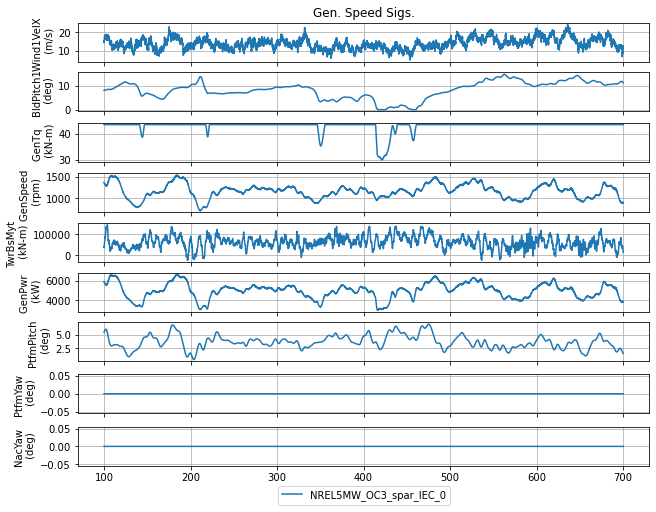

In [55]:
fig[0]